In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from pylab import imread, imsave
from skimage.color import rgb2gray

In [2]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
    # Convert ImageData and LabelData to List
    from matplotlib import pyplot as plt
    ImageArray = list(ImageData)
    LabelArray = list(LabelData)
    if(rows == 1 & cols == 1):
        fig = plt.figure(figsize=(20,20))
    else:
        fig = plt.figure(figsize=(cols*8,rows*5))

    for i in range(1, cols * rows + 1):
        fig.add_subplot(rows, cols, i)
        image = ImageArray[i - 1]
         # If the channel number is less than 3, we display as grayscale image
         # otherwise, we display as color image
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
            plt.grid(gridType)
        else:
            plt.imshow(image)
            plt.grid(gridType)
    plt.title(LabelArray[i - 1])
    plt.show()
def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

## Bài 1

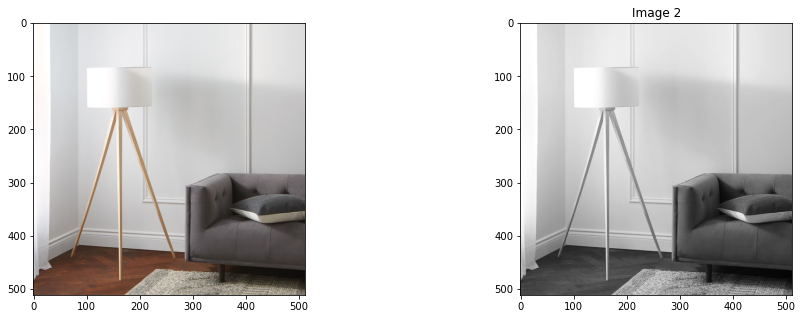

In [3]:
# Read Image
image_color = imread("Sample03/sofa.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowTwoImages(image_color, image_gray)

### Làm mờ ảnh với các kernel 3x3 và 5x5

Filtering Kernel 3x3:


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

Filtering Kernel 5x5:


array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

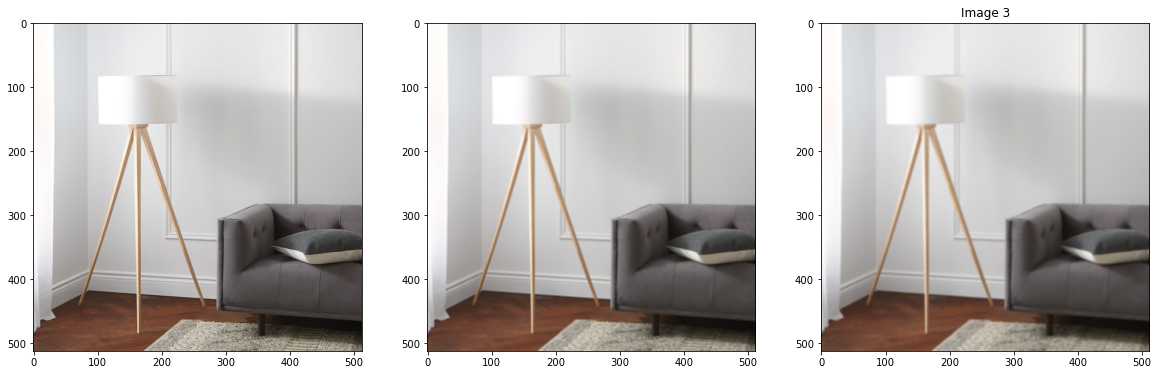

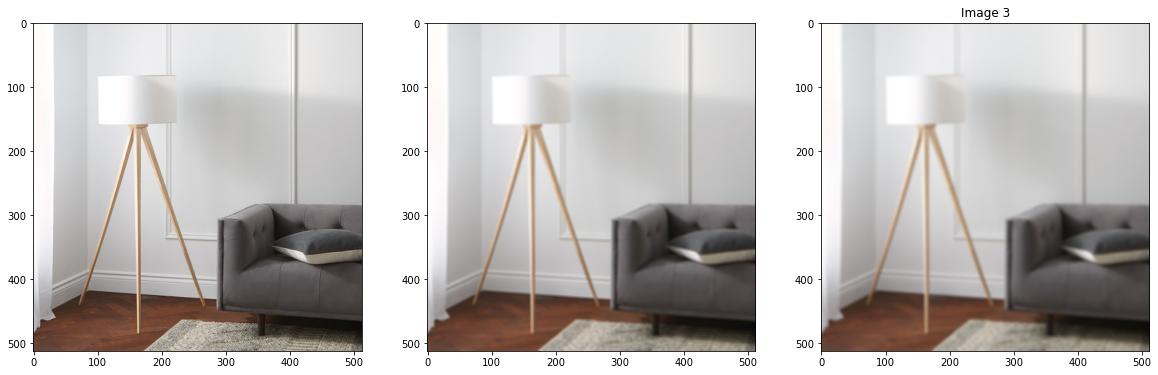

In [4]:
kernel_3_3 = np.ones((3,3),np.float32)/9
kernel_5_5 = np.ones((5,5),np.float32)/25
print("Filtering Kernel 3x3:")
display(kernel_3_3)
print("Filtering Kernel 5x5:")
display(kernel_5_5)
image_filter_3_3_01 = cv2.filter2D(image_color,-1,kernel_3_3)
image_filter_3_3_02 = cv2.filter2D(image_filter_3_3_01,-1,kernel_3_3)
image_filter_5_5_01 = cv2.filter2D(image_color,-1,kernel_5_5)
image_filter_5_5_02 = cv2.filter2D(image_filter_5_5_01,-1,kernel_5_5)
ShowThreeImages(image_color, image_filter_3_3_01, image_filter_3_3_02)
ShowThreeImages(image_color, image_filter_5_5_01, image_filter_5_5_02)

### Xuất giá trị đo mức độ mờ

In [5]:
def variance_of_laplacian(image):
     # compute the Laplacian of the image and then return the focus
     # measure, which is simply the variance of the Laplacian
     return cv2.Laplacian(image, cv2.CV_64F).var()


In [6]:
blur_mesurement = variance_of_laplacian(image_color)
blur_mesurement_3_3_01 = variance_of_laplacian(image_filter_3_3_01)
blur_mesurement_3_3_02 = variance_of_laplacian(image_filter_3_3_02)
print("Blur Measurement of image_color:", blur_mesurement)
print("Blur Measurement of image_filter_3_3_01:", blur_mesurement_3_3_01)
print("Blur Measurement of image_filter_3_3_02:", blur_mesurement_3_3_02)


Blur Measurement of image_color: 424.2608431387909
Blur Measurement of image_filter_3_3_01: 32.49074150718744
Blur Measurement of image_filter_3_3_02: 12.51062115894779


In [7]:
blur_mesurement = variance_of_laplacian(image_color)
blur_mesurement_5_5_01 = variance_of_laplacian(image_filter_5_5_01)
blur_mesurement_5_5_02 = variance_of_laplacian(image_filter_5_5_02)
print("Blur Measurement of image_color:", blur_mesurement)
print("Blur Measurement of image_filter_5_5_01:", blur_mesurement_5_5_01)
print("Blur Measurement of image_filter_5_5_02:", blur_mesurement_5_5_02)


Blur Measurement of image_color: 424.2608431387909
Blur Measurement of image_filter_5_5_01: 10.57958835677548
Blur Measurement of image_filter_5_5_02: 3.415116354886171


### Viết dòng thông tin về giá trị mức độ mờ trên ảnh

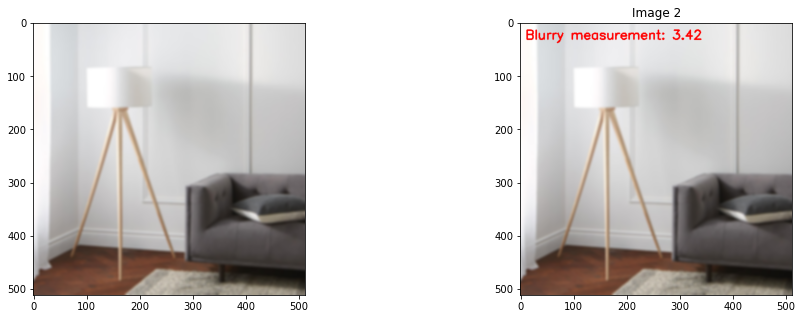

In [8]:
text = "Blurry measurement"
fm = blur_mesurement_5_5_02
image_filter_5_5_02_text = image_filter_5_5_02.copy()
cv2.putText(image_filter_5_5_02_text, "{}: {:.2f}".format(text, fm), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
(255, 0, 0), 2)
ShowTwoImages(image_filter_5_5_02, image_filter_5_5_02_text)

## Bài 2

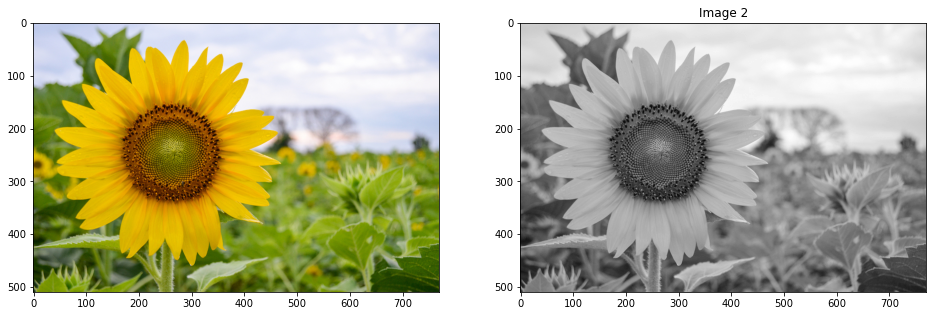

In [9]:
# Read Image
image_color = imread("Sample03/flower_2.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowTwoImages(image_color, image_gray)

### Làm rõ ảnh với các kernel 3x3 và 5x5

Filtering kernel_sharpen_01:


array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

Filtering kernel_sharpen_02:


array([[-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, 25, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1]])

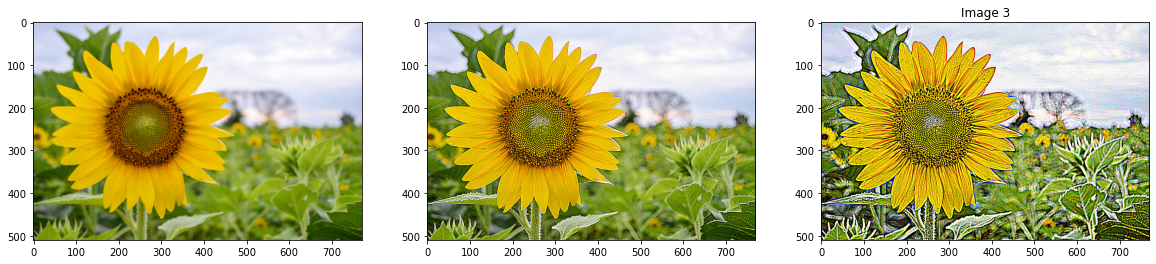

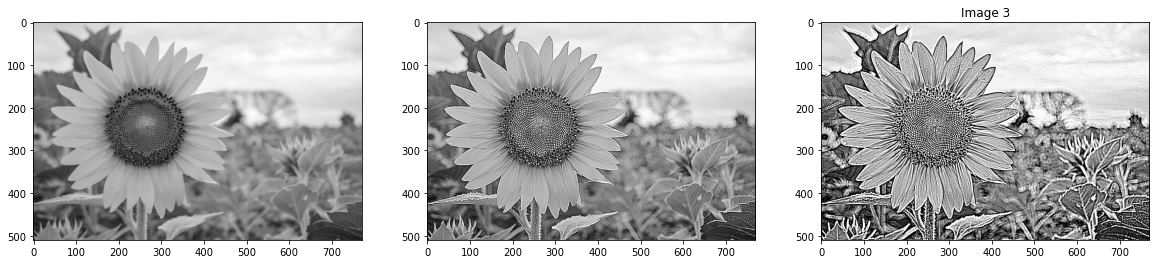

In [10]:
kernel_sharpen_01 = np.array([[-1,-1,-1],
 [-1, 9,-1],
 [-1,-1,-1]])
kernel_sharpen_02 =np.array([[-1,-1,-1,-1,-1],
          [-1,-1,-1,-1,-1],
         [-1, -1,25,-1,-1],
         [-1,-1,-1,-1,-1],
         [-1,-1,-1,-1,-1]])
print("Filtering kernel_sharpen_01:")
display(kernel_sharpen_01)
print("Filtering kernel_sharpen_02:")
display(kernel_sharpen_02)
image_color_sharpen_01 = cv2.filter2D(image_color, -1, kernel_sharpen_01)
image_gray_sharpen_01 = cv2.filter2D(image_gray, -1, kernel_sharpen_01)
image_color_sharpen_02 = cv2.filter2D(image_color, -1, kernel_sharpen_02)
image_gray_sharpen_02 = cv2.filter2D(image_gray, -1, kernel_sharpen_02)
ShowThreeImages(image_color, image_color_sharpen_01, image_color_sharpen_02)
ShowThreeImages(image_gray, image_gray_sharpen_01, image_gray_sharpen_02)

### Xuất giá trị đo mức độ rõ

In [11]:
print("Sharpen Measurement of image_color:", variance_of_laplacian(image_color))
print("Sharpen Measurement of image_color_sharpen_01:", variance_of_laplacian(image_color_sharpen_01))
print("Sharpen Measurement of image_color_sharpen_01:", variance_of_laplacian(image_color_sharpen_02))
print("Sharpen Measurement of image_gray:", variance_of_laplacian(image_gray))
print("Sharpen Measurement of image_gray_sharpen_01:", variance_of_laplacian(image_gray_sharpen_01))
print("Sharpen Measurement of image_gray_sharpen_01:", variance_of_laplacian(image_gray_sharpen_02))

Sharpen Measurement of image_color: 458.4116327940773
Sharpen Measurement of image_color_sharpen_01: 11170.959449601622
Sharpen Measurement of image_color_sharpen_01: 29411.538459131363
Sharpen Measurement of image_gray: 367.6566636404424
Sharpen Measurement of image_gray_sharpen_01: 10938.927339722139
Sharpen Measurement of image_gray_sharpen_01: 25540.133050838063


### Viết dòng thông tin về giá trị mức độ rõ trên ảnh

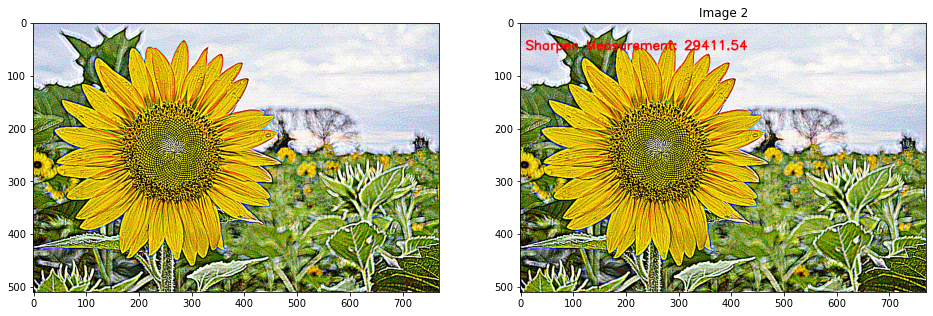

In [24]:
text = "Sharpen Measurement"
fm = variance_of_laplacian(image_color_sharpen_02)
image_color_sharpen_02_text = image_color_sharpen_02.copy()
cv2.putText(image_color_sharpen_02_text, "{}: {:.2f}".format(text, fm), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
(255, 0, 0), 2)
ShowTwoImages(image_color_sharpen_02, image_color_sharpen_02_text)

## Bài 3

### Viết hàm đọc toàn bộ ảnh trong thư mục 

In [13]:
import cv2
import os

def load_images_from_folder(path):
    Join = os.path.join
    files = [Join(path,f) for f in os.listdir(path)]
    images = []
    for path in files:
        images.append(imread(path))
    return images

    

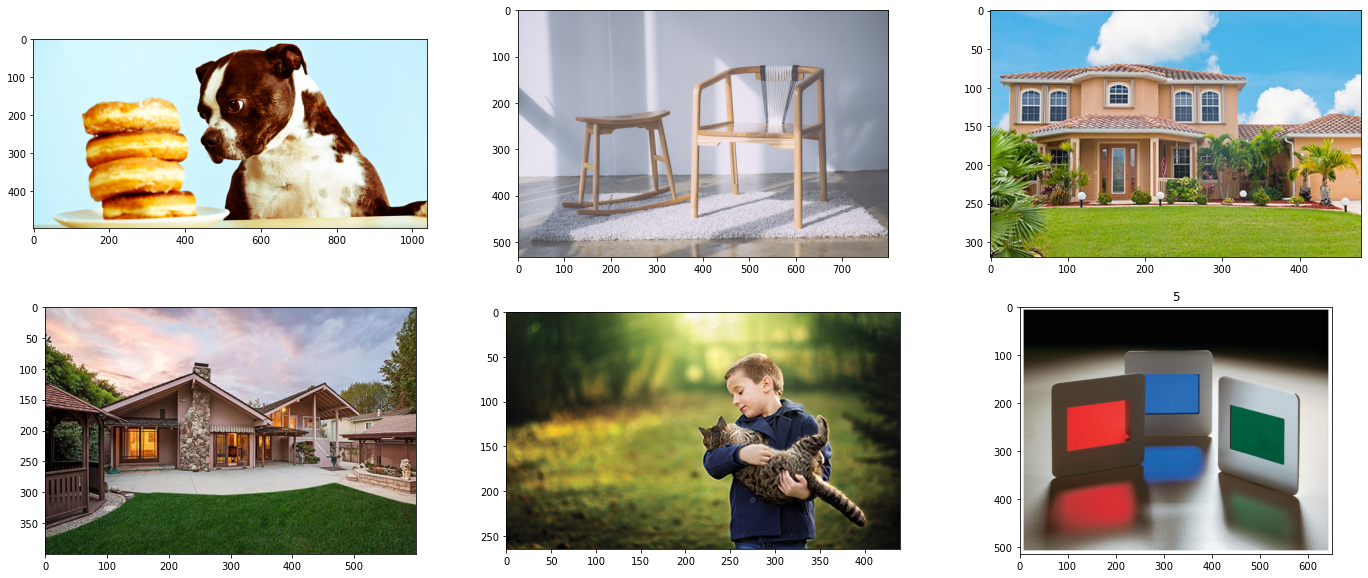

In [14]:
path="Image_Input"
list_images = load_images_from_folder(path)
ShowListImages(list_images,len(list_images)//3,3)

### Định nghĩa ngưỡng mờ dựa trên giá độ đo mờ

In [15]:
for i in range(len(list_images)):
    print("Blur Measurement of image_color {}: {}".format(i, variance_of_laplacian(list_images[i])))

Blur Measurement of image_color 0: 460.12285089856954
Blur Measurement of image_color 1: 377.37529522721206
Blur Measurement of image_color 2: 2272.323747420017
Blur Measurement of image_color 3: 2516.730283159722
Blur Measurement of image_color 4: 587.4574180909062
Blur Measurement of image_color 5: 325.34208639219986
Blur Measurement of image_color 6: 424.2608431387909


In [16]:
blur_threshold = 500

#### Đọc lần lượt các ảnh : nếu ảnh nào ngoài ngưỡng mờ ta ghi một dòng thông tin trên ảnh là “Blur Image :” kèm giá trị mờ. Nếu ảnh nào tốt thì ta ghi “Good Image” trên ảnh. 

In [17]:
text_images = []
for i in range(len(list_images)):
    if variance_of_laplacian(list_images[i]) > blur_threshold:
        img_text = list_images[i].copy()
        cv2.putText(img_text, "{}".format("Good Image"), (10, 30), \
                    cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 2)
        text_images.append(img_text)
    else:
        img_text = list_images[i].copy()
        cv2.putText(img_text, "{}: {:.2f}".format("Blur Image", variance_of_laplacian(list_images[i])), (10, 30), \
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
        text_images.append(img_text)

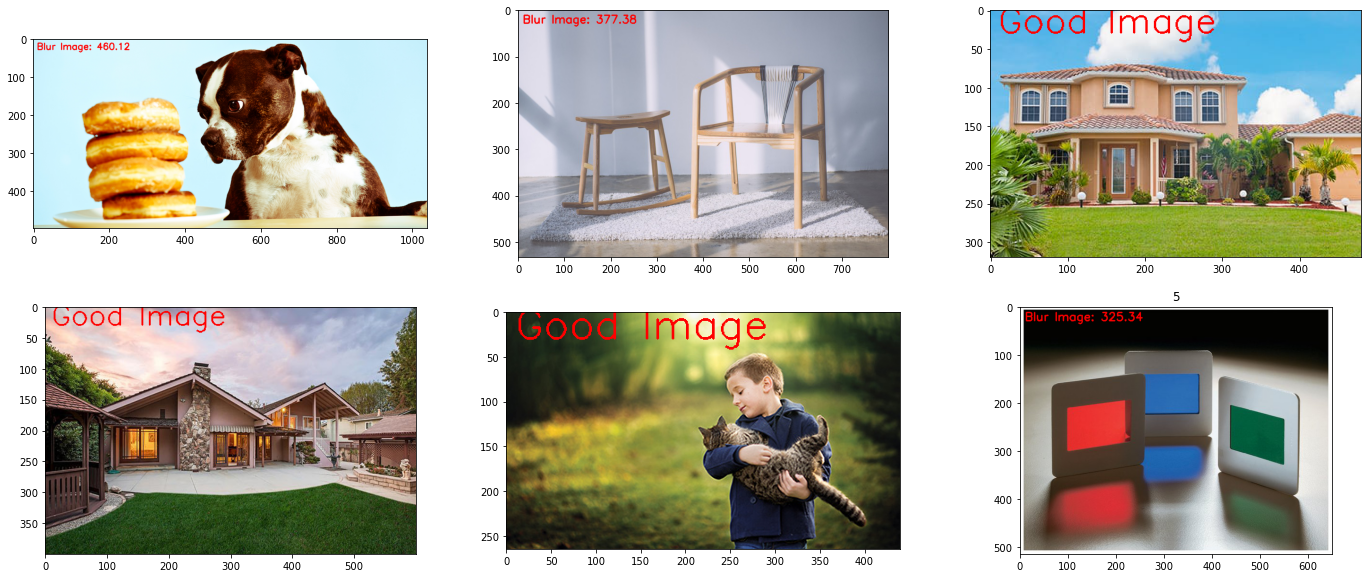

In [18]:
ShowListImages(text_images, 2, 3)

In [25]:
path = 'Image_BlurDetection_Output'
os.mkdir(path)
for i in range(len(text_images)):
    imsave(os.path.join(path, '{}.jpg'.format(i)), text_images[i])

## Bài 4

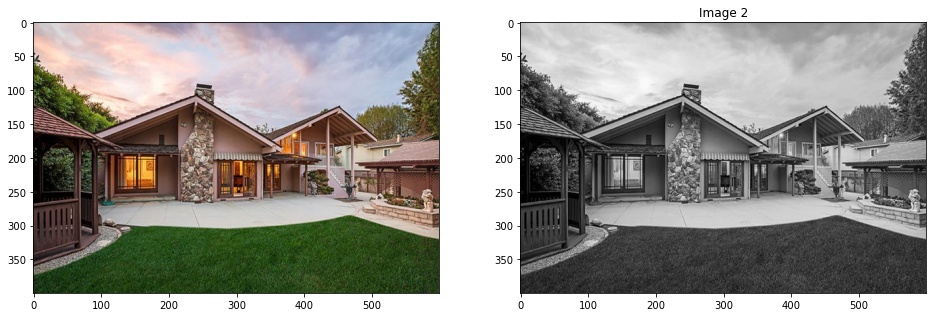

In [26]:
# Read Image
image_color = imread("Sample03/house_2.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowTwoImages(image_color, image_gray)

### Xuất ảnh từng điểm ảnh hiển thị giá trị RGBMax

In [27]:
def max_rgb_filter(image):
    # split the image into its BGR components
    (B, G, R) = cv2.split(image)
    # find the maximum pixel intensity values for each
    # (x, y)-coordinate,, then set all pixel values less
    # than M to zero
    M = np.maximum(np.maximum(R, G), B)
    R[R < M] = 0
    G[G < M] = 0
    B[B < M] = 0
    # merge the channels back together and return the image
    return cv2.merge([B, G, R])

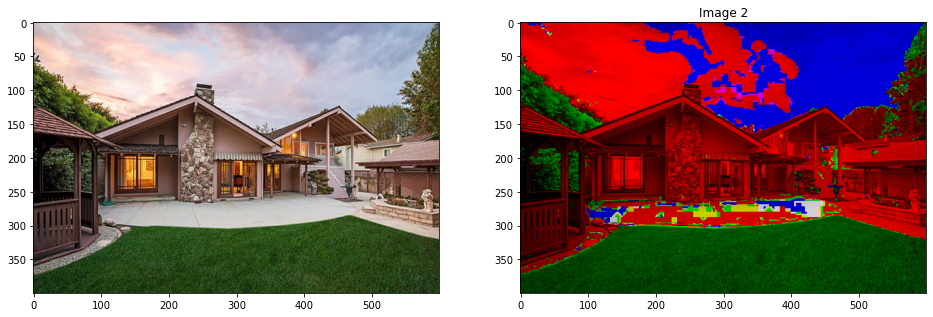

In [28]:
image_color_rgbmax = max_rgb_filter(image_color)
ShowTwoImages(image_color, image_color_rgbmax)

In [29]:
def SegmentColorImageByMask(IM, Mask):
    Mask = Mask.astype(np.uint8)
    result = cv2.bitwise_and(IM, IM, mask = Mask)
    return result

### Xuất các vị trí có giá trị R đạt max, G đạt max và B đạt max

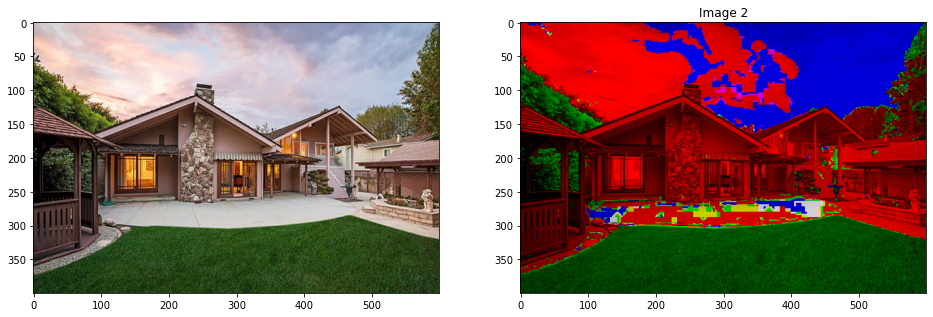

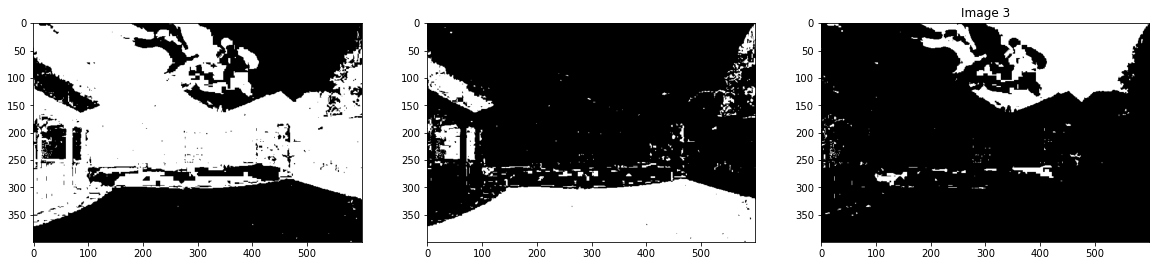

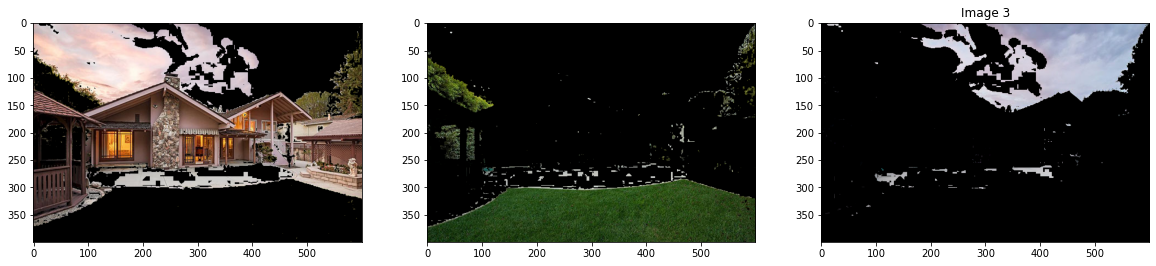

In [30]:
image_maxR_mask = image_gray < 0
image_maxG_mask = image_gray < 0
image_maxB_mask = image_gray < 0

R = image_color_rgbmax[:,:,0]
G = image_color_rgbmax[:,:,1]
B = image_color_rgbmax[:,:,2]

image_maxR_mask[(G == 0) & (B == 0)] = 1
image_maxG_mask[(R == 0) & (B == 0)] = 1
image_maxB_mask[(G == 0) & (R == 0)] = 1

image_maxR = SegmentColorImageByMask(image_color, image_maxR_mask)
image_maxG = SegmentColorImageByMask(image_color, image_maxG_mask)
image_maxB = SegmentColorImageByMask(image_color, image_maxB_mask)

ShowTwoImages(image_color, image_color_rgbmax)
ShowThreeImages(image_maxR_mask, image_maxG_mask, image_maxB_mask)
ShowThreeImages(image_maxR, image_maxG, image_maxB)

#### Thưc hiện làm mờ ảnh rồi sau đó làm rõ ảnh và so sánh giá trị độ đo mờ có giống ảnh gốc không

In [31]:
# Use function OpenCV
print("Blur Measurement of image_color:", variance_of_laplacian(image_color))
image_color_blur_02 = cv2.GaussianBlur(image_color,(5,5),0)
image_color_sharpen_02 = cv2.filter2D(image_color_blur_02, -1, kernel_sharpen_02)
print("Blur Measurement of image_color after blur and sharpen:", variance_of_laplacian(image_color_sharpen_02))

Blur Measurement of image_color: 2516.730283159722
Blur Measurement of image_color after blur and sharpen: 16298.072266227779


#### Thưc hiện làm rõ ảnh rồi sau đó làm mờ ảnh và so sánh giá trị độ đo mờ có giống ảnh gốc không

In [32]:
print("Blur Measurement of image_color:", variance_of_laplacian(image_color))
image_color_sharpen_02 = cv2.filter2D(image_color, -1, kernel_sharpen_02)
image_color_blur_02 = cv2.GaussianBlur(image_color_sharpen_02,(5,5),0)
print("Blur Measurement of image_color after sharpen and blur:", variance_of_laplacian(image_color_blur_02))

Blur Measurement of image_color: 2516.730283159722
Blur Measurement of image_color after sharpen and blur: 1440.0133764517575


### Tìm cạnh và tạo ra các ảnh về cạnh sau : ảnh cạnh ngang, cạnh dọc và ảnh cạnh tổng

In [33]:
# construct the Laplacian kernel used to detect edge-like
# regions of an image
# construct the Sobel x-axis kernel
kernel_sobelX = np.array((
 [-1, 0, 1],
 [-2, 0, 2],
 [-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
kernel_sobelY = np.array((
 [-1, -2, -1],
 [0, 0, 0],
 [1, 2, 1]), dtype="int")

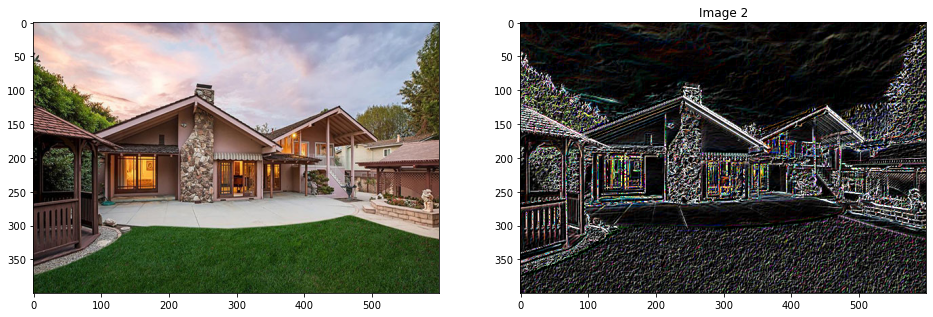

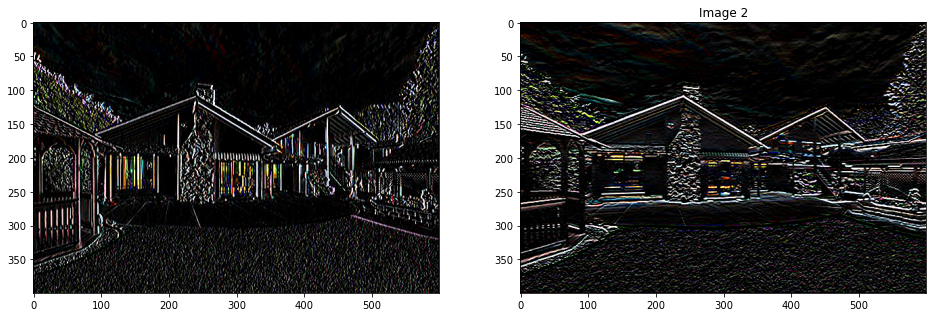

In [34]:
image_color_edge_sobelX = cv2.filter2D(image_color, -1, kernel_sobelX)
image_color_edge_sobelY = cv2.filter2D(image_color, -1, kernel_sobelY)
image_color_edge = image_color_edge_sobelX + image_color_edge_sobelY
ShowTwoImages(image_color, image_color_edge)
ShowTwoImages(image_color_edge_sobelX, image_color_edge_sobelY)

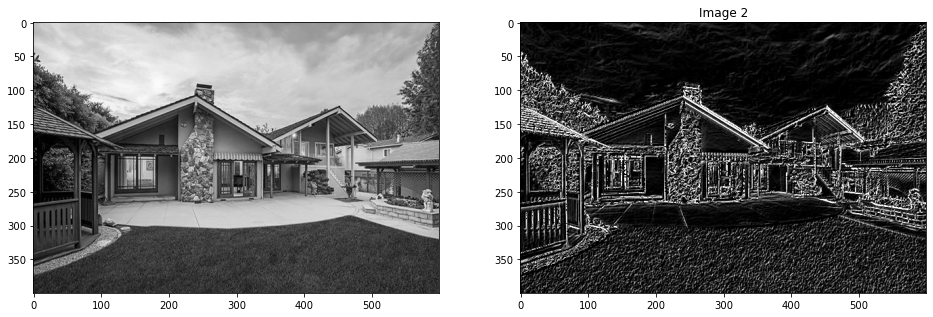

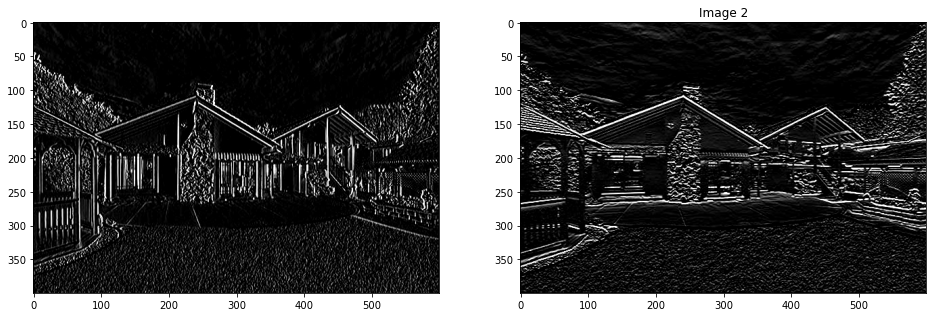

In [35]:
image_gray_edge_sobelX = cv2.filter2D(image_gray, -1, kernel_sobelX)
image_gray_edge_sobelY = cv2.filter2D(image_gray, -1, kernel_sobelY)
image_gray_edge = image_gray_edge_sobelX + image_gray_edge_sobelY
ShowTwoImages(image_gray, image_gray_edge)
ShowTwoImages(image_gray_edge_sobelX, image_gray_edge_sobelY)